# **Logistic Regression**

**Logistic Regression** is a supervised learning algorithm used for classification tasks, not regression, despite its name. It estimates the probability that a given input point belongs to a certain class by applying a logistic (sigmoid) function to a linear combination of input features. The output is a probability between 0 and 1, making it ideal for binary classification problems (two possible outcomes, like yes/no, spam/not spam).

**Logistic regression** predicts a binary outcome based on one or more predictor variables (features) and is one of the foundational techniques in machine learning and statistics.

#### When to Use Logistic Regression?

Logistic Regression is commonly used when:

- **The dependent variable is binary**: For example, a classification problem where the output is either "1" or "0" (e.g., true/false, success/failure).

- **You need probabilistic interpretations**: Logistic regression outputs probabilities that a data point belongs to a certain class, which makes it useful in areas where you need both the prediction and the confidence of that prediction.

- **When interpretability is important**: It provides clear and interpretable coefficients, which can explain the impact of each feature on the prediction.

- **The relationship between features and the target is linear in the log-odds**: While logistic regression assumes a linear relationship between the features and the log-odds of the outcome, it can still handle non-linear relationships by transforming the input features (e.g., polynomial or interaction terms).

#### Typical use cases include:

- **Medical Diagnosis**: Predicting whether a patient has a disease or not.

- **Email Classification**: Determining whether an email is spam or not.

- **Customer Churn**: Predicting whether a customer will leave a service or remain.

- **Credit Scoring**: Estimating the probability of a customer defaulting on a loan.

#### Who Should Use Logistic Regression?

Logistic Regression is ideal for:

- **Data scientists and machine learning practitioners** who need a simple, interpretable model for binary classification tasks.

- **Business analysts and researchers** looking for an explainable model where they can interpret the effect of each feature on the outcome.

- **Medical professionals** making decisions based on classification problems like disease detection.

- **Beginner machine learning students** since logistic regression is one of the simplest and easiest algorithms to learn and apply.

#### Advantages of Logistic Regression:

- **Simplicity and Interpretability**: It is easy to implement and interpret, making it a popular choice for binary classification problems.

- **Probabilistic Output**: Logistic regression provides probabilities for class membership, which can be useful for understanding the confidence of predictions.

- **Fast and Efficient**: It performs well on relatively small datasets and is computationally efficient.

- **No Feature Scaling Required**: While performance can be improved by scaling features, logistic regression does not require it.

- **Linear Decision Boundary**: The decision boundary is linear, which makes it suitable for linearly separable datasets.


#### Disadvantages of Logistic Regression:

- **Limited to Linear Boundaries**: Logistic regression assumes a linear relationship between the features and the log-odds, making it unsuitable for complex or highly non-linear problems.

- **Assumes Independence of Features**: Like Naive Bayes, logistic regression assumes that the features are independent of each other, which may not hold true in many cases.
Cannot Handle Multiclass Problems Directly: Logistic regression is a binary classifier by default, but techniques like One-vs-Rest or Softmax Regression can extend it to multiclass problems.
- **Sensitive to Outliers**: Logistic regression can be sensitive to outliers, which can skew the decision boundary.

#### Real-World Applications of Logistic Regression:

1. **Credit Scoring**: Predicting the probability of a customer defaulting on a loan.

2. **Medical Diagnosis**: Predicting the likelihood of a disease based on symptoms.

3. **Customer Retention**: Estimating the probability that a customer will churn or stay with the company.

4. **Marketing Campaigns**: Predicting whether a customer will respond to an advertisement or not.

5. **Email Classification**: Classifying emails as spam or non-spam.

In [1]:
import pandas as pd

d = {
        'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
        'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]
    }

df = pd.DataFrame(data=d)
df

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no
...,...,...
96,67,yes
97,74,yes
98,79,yes
99,90,yes


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

import seaborn as sns

finished_race = ['no', 'yes']
enc = OrdinalEncoder(categories=[finished_race])
df['completed_50m_ultra'] = enc.fit_transform(df[['completed_50m_ultra']])

df

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0


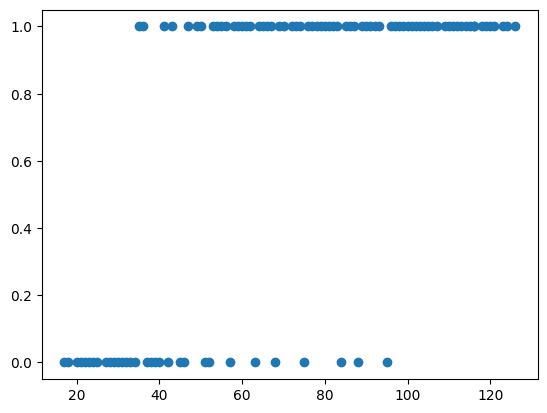

In [3]:
plt.scatter(df['miles_per_week'], df['completed_50m_ultra'])

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

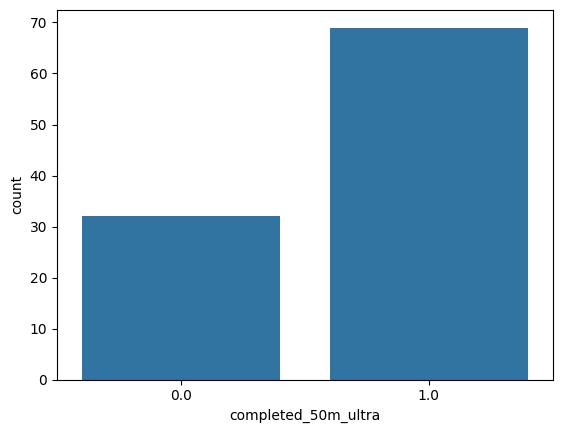

In [4]:
sns.countplot(x='completed_50m_ultra', data=df)

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=11)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9047619047619048

In [6]:
print(confusion_matrix(y_test, y_pred))

[[ 5  1]
 [ 1 14]]


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.93      0.93      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21

